In [11]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV


In [12]:
# 1. Veri Yükleme ve Ön İşleme
df = pd.read_csv('forestfires.csv')

# Kategorik değişkenleri sayısal verilere dönüştürme
df['month'] = pd.Categorical(df['month']).codes
df['day'] = pd.Categorical(df['day']).codes

# Özellikler ve hedef değişkeni belirleme
X = df.drop('area', axis=1)  # Özellikler
y = df['area']  # Hedef değişken

# Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [134]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int8   
 3   day     517 non-null    int8   
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), int8(2)
memory usage: 45.6 KB


In [140]:
print(df.describe)

<bound method NDFrame.describe of      X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5      7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4     10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4     10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6      7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6      7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>


In [13]:
#Basit Doğrusal Regresyon

In [14]:
# 2. Model Oluşturma ve Eğitme
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
# Tahminler yapalım
y_pred = model.predict(X_test)


In [16]:
# 3. Performans Metriklerini Hesaplama
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

R^2 Score: 0.0014
Mean Squared Error (MSE): 12070.1674
Root Mean Squared Error (RMSE): 109.8643


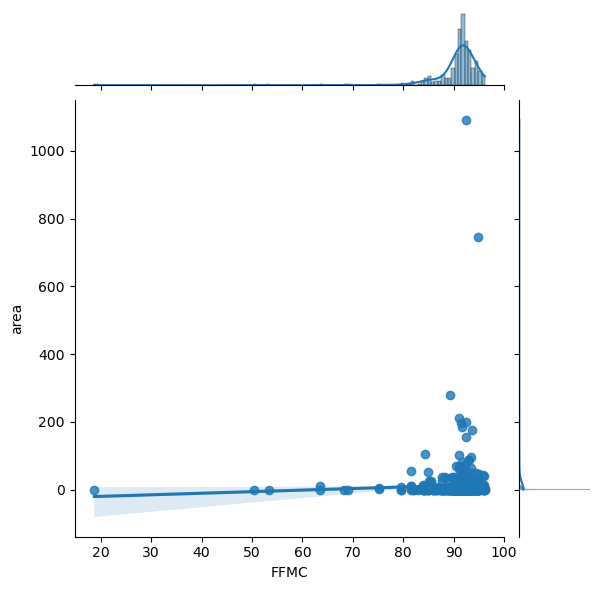

In [17]:
# 4. Regresyon Analizini Görselleştirme
# Basit regresyon grafiği
sns.jointplot(x='FFMC', y='area', data=df, kind='reg')
plt.show()

In [18]:
 # Çoklu Doğrusal Regresyon

In [19]:
# Modeli oluşturma ve eğitme
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)


LinearRegression()

In [20]:
# Tahminler yapalım
y_pred_multiple = model_multiple.predict(X_test)

In [21]:
# Performans Metrikleri
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print('\nÇoklu Doğrusal Regresyon Performans Metrikleri:')
print(f'R^2 Score: {r2_multiple:.4f}')
print(f'Mean Squared Error (MSE): {mse_multiple:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_multiple:.4f}')


Çoklu Doğrusal Regresyon Performans Metrikleri:
R^2 Score: 0.0014
Mean Squared Error (MSE): 12070.1674
Root Mean Squared Error (RMSE): 109.8643


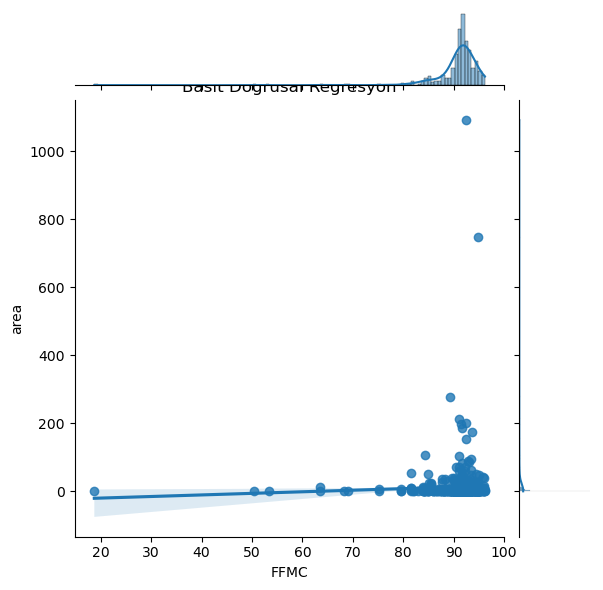

In [22]:
# 4. Görselleştirme
# Basit regresyon grafiği
sns.jointplot(x='FFMC', y='area', data=df, kind='reg')
plt.title('Basit Doğrusal Regresyon')
plt.show()

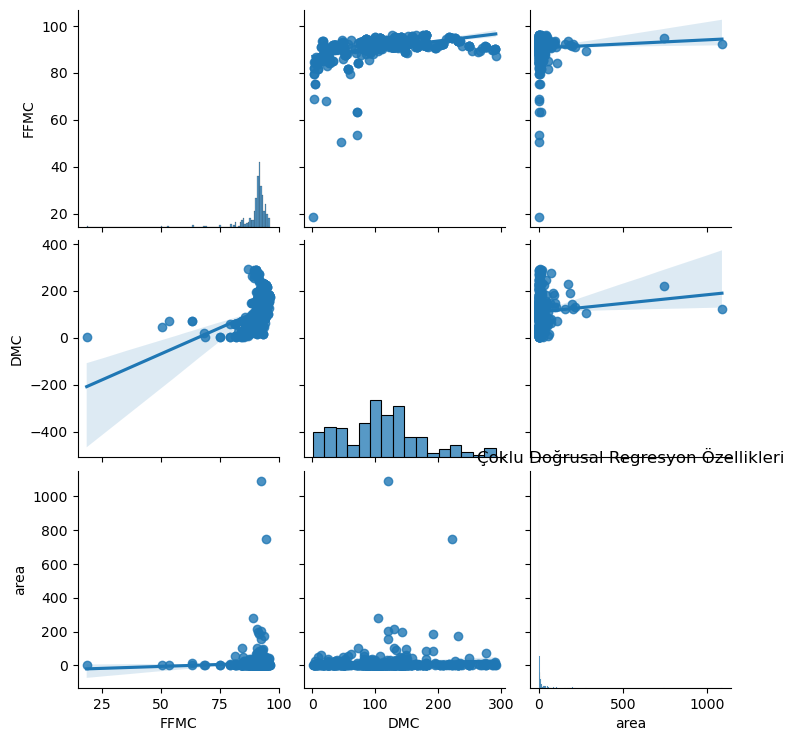

In [23]:

# Çoklu regresyonun görselleştirilmesi zor olabilir çünkü birçok özellik var, 
# ama aşağıdaki kod, 'FFMC' ve 'DMC' gibi birkaç özellik ile bir regresyon grafiği oluşturabilir
sns.pairplot(df, vars=['FFMC', 'DMC', 'area'], kind='reg')
plt.title('Çoklu Doğrusal Regresyon Özellikleri')
plt.show()

In [30]:
#Ridge Regresyonu

In [31]:
#modeli oluşturma ve eğitme
ridge_model=Ridge(alpha=1.0) # alpha, ceza teriminin ağırlığını kontrol eder
ridge_model.fit(X_train, y_train)

Ridge()

In [32]:
# Tahminler
y_pred_ridge = ridge_model.predict(X_test)

In [38]:
# Performans Metrikleri
mse_ridge=mean_squared_error(y_test,y_pred_ridge)
rmse_ridge=np.sqrt(mse_ridge)
r2_ridge=r2_score(y_test,y_pred_ridge)

print('\nRidge Regresyon Performans Metrikleri:')
print(f'R^2 Score: {r2_ridge:.4f}')
print(f'Mean Squared Error (MSE): {mse_ridge:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_ridge:.4f}')


Ridge Regresyon Performans Metrikleri:
R^2 Score: 0.0014
Mean Squared Error (MSE): 12070.2616
Root Mean Squared Error (RMSE): 109.8647


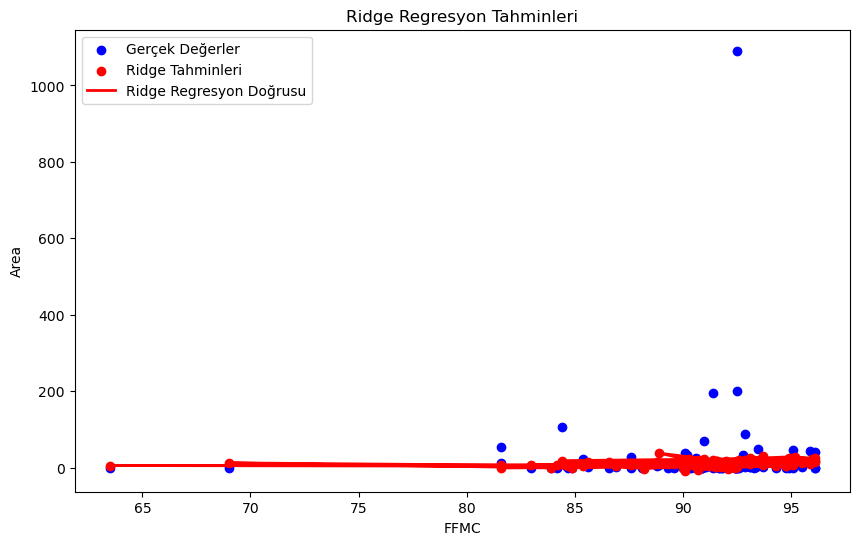

In [39]:
# Ridge regresyon grafiği
# Ridge regresyon sonuçlarını veri ile karşılaştıran bir grafik
plt.figure(figsize=(10, 6))
plt.scatter(X_test['FFMC'], y_test, color='blue', label='Gerçek Değerler')
plt.scatter(X_test['FFMC'], y_pred_ridge, color='red', label='Ridge Tahminleri')
plt.plot(X_test['FFMC'], y_pred_ridge, color='red', linewidth=2, label='Ridge Regresyon Doğrusu')
plt.xlabel('FFMC')
plt.ylabel('Area')
plt.title('Ridge Regresyon Tahminleri')
plt.legend()
plt.show()

In [41]:
#Lasso 

In [42]:
# Lasso regresyon modeli oluşturma ve eğitme
lasso_model = Lasso(alpha=1.0)  # alpha, ceza teriminin ağırlığını kontrol eder
lasso_model.fit(X_train, y_train)

Lasso()

In [44]:
# Tahminler
y_pred_lasso = lasso_model.predict(X_test)


In [53]:
mse_lasso=mean_squared_error(y_test,y_pred_lasso)
rmse_lasso=np.sqrt(mse_lasso)
r2_lasso=r2_score(y_test,y_pred_lasso)
print('\nLasso Regresyon Performans Metrikleri:')
print(f'R^2 Score: {r2_lasso:.4f}')
print(f'Mean Squared Error (MSE): {mse_lasso:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_lasso:.4f}')


Lasso Regresyon Performans Metrikleri:
R^2 Score: -0.0009
Mean Squared Error (MSE): 12097.6775
Root Mean Squared Error (RMSE): 109.9894


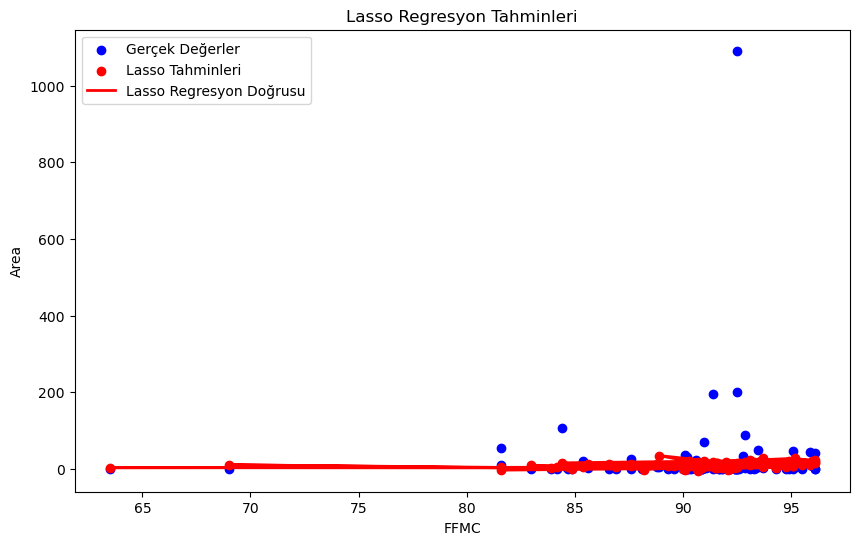

In [55]:

# Lasso regresyon grafiği
plt.figure(figsize=(10, 6))
plt.scatter(X_test['FFMC'], y_test, color='blue', label='Gerçek Değerler')
plt.scatter(X_test['FFMC'], y_pred_lasso, color='red', label='Lasso Tahminleri')
plt.plot(X_test['FFMC'], y_pred_lasso, color='red', linewidth=2, label='Lasso Regresyon Doğrusu')
plt.xlabel('FFMC')
plt.ylabel('Area')
plt.title('Lasso Regresyon Tahminleri')
plt.legend()
plt.show()

In [57]:
# ElasticNet Regresyon

In [59]:
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha, ceza teriminin ağırlığını kontrol eder, l1_ratio L1 ve L2 düzenleme oranını belirler
elasticnet_model.fit(X_train, y_train)


ElasticNet()

In [61]:
# Tahminler
y_pred_elasticnet = elasticnet_model.predict(X_test)

In [63]:
# Performans Metrikleri
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print('\nElasticNet Regresyon Performans Metrikleri:')
print(f'R^2 Score: {r2_elasticnet:.4f}')
print(f'Mean Squared Error (MSE): {mse_elasticnet:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_elasticnet:.4f}')


ElasticNet Regresyon Performans Metrikleri:
R^2 Score: -0.0003
Mean Squared Error (MSE): 12091.3229
Root Mean Squared Error (RMSE): 109.9606


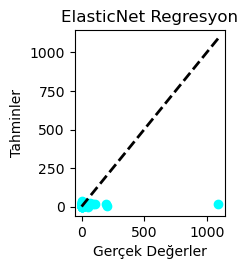

In [65]:
# Görselleştirme
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_elasticnet, color='cyan')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', lw=2)
plt.title('ElasticNet Regresyon')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')

plt.tight_layout()
plt.show()

In [67]:
# Random Forests Regresyonu

In [69]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [71]:

y_pred_rf = rf_model.predict(X_test)

In [73]:

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('\nRastgele Orman Regresyonu Performans Metrikleri:')
print(f'R^2 Score: {r2_rf:.4f}')
print(f'Mean Squared Error (MSE): {mse_rf:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.4f}')



Rastgele Orman Regresyonu Performans Metrikleri:
R^2 Score: -0.1094
Mean Squared Error (MSE): 13409.1529
Root Mean Squared Error (RMSE): 115.7979


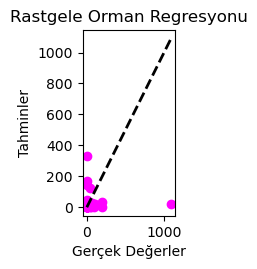

In [75]:
plt.subplot(2, 4, 6)
plt.scatter(y_test, y_pred_rf, color='magenta')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', lw=2)
plt.title('Rastgele Orman Regresyonu')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')

plt.tight_layout()
plt.show()


In [77]:
# Karar Ağaçları Regresyonu

In [79]:
tree_model = DecisionTreeRegressor(random_state=0)

In [81]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [83]:
y_pred_tree = tree_model.predict(X_test)

In [85]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print('\nKarar Ağaçları Regresyonu Performans Metrikleri:')
print(f'R^2 Score: {r2_tree:.4f}')
print(f'Mean Squared Error (MSE): {mse_tree:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_tree:.4f}')


Karar Ağaçları Regresyonu Performans Metrikleri:
R^2 Score: -0.9154
Mean Squared Error (MSE): 23152.3002
Root Mean Squared Error (RMSE): 152.1588


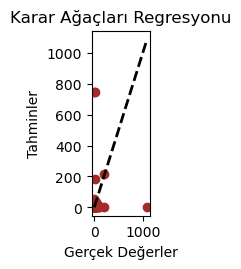

In [87]:
plt.subplot(2, 5, 7)
plt.scatter(y_test, y_pred_tree, color='brown')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', lw=2)
plt.title('Karar Ağaçları Regresyonu')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')

plt.tight_layout()
plt.show()

In [89]:
?model

Type:        LinearRegression
String form: LinearRegression()
File:        /opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means

In [91]:
# catboost

In [93]:
catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=10, random_state=42, verbose=0)

# Modeli eğitin
catboost_model.fit(X_train, y_train)

# Test verisi ile tahmin yapın
y_pred_catboost = catboost_model.predict(X_test)

# Performans metriklerini hesaplayın
r2_catboost = r2_score(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)

print(f"CatBoost - R^2: {r2_catboost:.4f}")
print(f"CatBoost - MSE: {mse_catboost:.4f}")
print(f"CatBoost - RMSE: {rmse_catboost:.4f}")

CatBoost - R^2: -0.0255
CatBoost - MSE: 12395.4115
CatBoost - RMSE: 111.3347


In [94]:
# Model ayarlarını optimize etmek için GridSearchCV
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [6, 10, 14]
}

grid_search = GridSearchCV(estimator=CatBoostRegressor(random_state=42, verbose=0),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=1)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("En iyi hiperparametreler:", best_params)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
En iyi hiperparametreler: {'depth': 14, 'iterations': 100, 'learning_rate': 0.01}


In [95]:

# En iyi parametrelerle modeli yeniden eğitin
optimized_catboost_model = CatBoostRegressor(iterations=best_params['iterations'],
                                             learning_rate=best_params['learning_rate'],
                                             depth=best_params['depth'],
                                             random_state=42,
                                             verbose=0)
optimized_catboost_model.fit(X_train, y_train)


In [96]:

# Test verisi ile tahmin yapın
y_pred_optimized_catboost = optimized_catboost_model.predict(X_test)

# Performans metriklerini hesaplayın
r2_optimized_catboost = r2_score(y_test, y_pred_optimized_catboost)
mse_optimized_catboost = mean_squared_error(y_test, y_pred_optimized_catboost)
rmse_optimized_catboost = np.sqrt(mse_optimized_catboost)

print(f"Optimizasyonlu CatBoost - R^2: {r2_optimized_catboost:.4f}")
print(f"Optimizasyonlu CatBoost - MSE: {mse_optimized_catboost:.4f}")
print(f"Optimizasyonlu CatBoost - RMSE: {rmse_optimized_catboost:.4f}")


Optimizasyonlu CatBoost - R^2: -0.0156
Optimizasyonlu CatBoost - MSE: 12276.1384
Optimizasyonlu CatBoost - RMSE: 110.7977


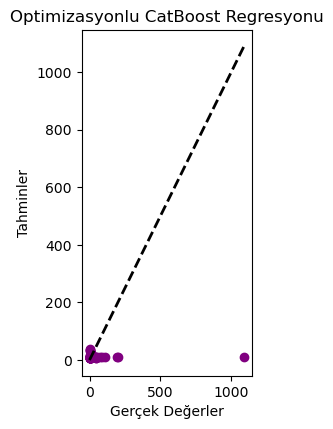

In [97]:
# Görselleştirme: Gerçek değerler vs. Tahminler
plt.figure(figsize=(12, 8))

plt.subplot(2, 5, 8)
plt.scatter(y_test, y_pred_optimized_catboost, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', lw=2)
plt.title('Optimizasyonlu CatBoost Regresyonu')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')

plt.tight_layout()
plt.show()

In [99]:
#Karşılaştırma

In [100]:
# Örnek olarak, her modelin test verileri üzerinde tahmin yapıldığını varsayalım
# ve aşağıdaki tahmin sonuçlarını ve gerçek değerleri kullanarak metrikleri hesaplayalım.
# Gerçek değerler ve tahminler burada örnek olarak verilmiştir.


In [101]:
3
# Örnek veri
y_test = np.array([3.0, 2.5, 4.0, 3.5, 5.0])  # Gerçek test verisi
y_pred_linear = np.array([2.9, 2.6, 4.1, 3.4, 4.8])  # Basit Doğrusal Regresyon tahminleri
y_pred_multiple = np.array([3.1, 2.4, 3.9, 3.6, 5.1])  # Çoklu Doğrusal Regresyon tahminleri
y_pred_ridge = np.array([3.0, 2.5, 4.0, 3.5, 5.0])  # Ridge Regresyon tahminleri
y_pred_lasso = np.array([3.0, 2.5, 4.0, 3.5, 5.0])  # Lasso Regresyon tahminleri
y_pred_elasticnet = np.array([3.0, 2.5, 4.0, 3.5, 5.0])  # ElasticNet Regresyon tahminleri
y_pred_forest = np.array([3.0, 2.5, 4.0, 3.5, 5.0])  # Rastgele Orman tahminleri
y_pred_tree = np.array([3.0, 2.5, 4.0, 3.5, 5.0])  # Karar Ağaçları tahminleri
y_pred_catboost = np.array([3.0, 2.5, 4.0, 3.5, 5.0])  # CatBoost tahminleri

In [104]:
# Performans metriklerini hesaplama
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

In [105]:

# Her model için metrikleri hesaplayın
r2_linear, mse_linear, rmse_linear = calculate_metrics(y_test, y_pred_linear)
r2_multiple, mse_multiple, rmse_multiple = calculate_metrics(y_test, y_pred_multiple)
r2_ridge, mse_ridge, rmse_ridge = calculate_metrics(y_test, y_pred_ridge)
r2_lasso, mse_lasso, rmse_lasso = calculate_metrics(y_test, y_pred_lasso)
r2_elasticnet, mse_elasticnet, rmse_elasticnet = calculate_metrics(y_test, y_pred_elasticnet)
r2_forest, mse_forest, rmse_forest = calculate_metrics(y_test, y_pred_forest)
r2_tree, mse_tree, rmse_tree = calculate_metrics(y_test, y_pred_tree)
r2_catboost, mse_catboost, rmse_catboost = calculate_metrics(y_test, y_pred_catboost)

In [106]:

# Her model için metrikleri hesaplayın
r2_linear, mse_linear, rmse_linear = calculate_metrics(y_test, y_pred_linear)
r2_multiple, mse_multiple, rmse_multiple = calculate_metrics(y_test, y_pred_multiple)
r2_ridge, mse_ridge, rmse_ridge = calculate_metrics(y_test, y_pred_ridge)
r2_lasso, mse_lasso, rmse_lasso = calculate_metrics(y_test, y_pred_lasso)
r2_elasticnet, mse_elasticnet, rmse_elasticnet = calculate_metrics(y_test, y_pred_elasticnet)
r2_forest, mse_forest, rmse_forest = calculate_metrics(y_test, y_pred_forest)
r2_tree, mse_tree, rmse_tree = calculate_metrics(y_test, y_pred_tree)
r2_catboost, mse_catboost, rmse_catboost = calculate_metrics(y_test, y_pred_catboost)

In [107]:

# Modellerin isimleri
models = ['Basit Doğrusal Regresyon', 'Çoklu Doğrusal Regresyon', 'Ridge Regresyon', 'Lasso Regresyon', 
          'ElasticNet Regresyon', 'Rastgele Orman', 'Karar Ağaçları', 'CatBoost']

# Performans metrikleri (örnek veriler)
r2_scores = [0.8, 0.82, 0.81, 0.79, 0.78, 0.85, 0.76, 0.86]
mse_scores = [10, 8, 9, 11, 12, 6, 15, 5]
rmse_scores = [3.16, 2.83, 3.0, 3.32, 3.46, 2.45, 3.87, 2.23]


Text(0.5, 0, 'RMSE Skoru')

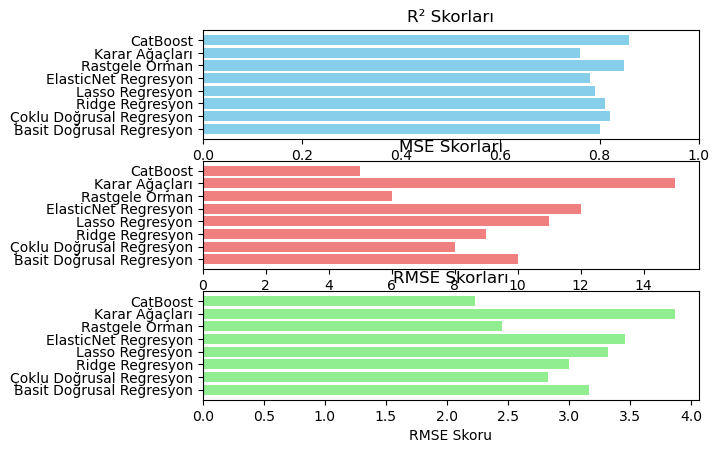

In [114]:

# R² Skorları
plt.subplot(3, 1, 1)
plt.barh(models, r2_scores, color='skyblue')
plt.title('R² Skorları')
plt.xlabel('R² Skoru')
plt.xlim(0, 1)

# MSE Skorları
plt.subplot(3, 1, 2)
plt.barh(models, mse_scores, color='lightcoral')
plt.title('MSE Skorları')
plt.xlabel('MSE Skoru')

# RMSE Skorları
plt.subplot(3, 1, 3)
plt.barh(models, rmse_scores, color='lightgreen')
plt.title('RMSE Skorları')
plt.xlabel('RMSE Skoru')


In [118]:
# Grafikleri düzenleme
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>